## Getting started with bombcell

#### Install bombcell

Create a conda environment
```bash
conda create -n bombcell python=3.11
conda activate bombcell
```
Clone latest bombcell repository from github
```bash
git clone https://github.com/Julie-Fabre/bombcell.git
```
Install bombcell from local repository
```bash
cd bombcell/pyBombCell
# you could do `pip install .`, but uv is much quicker!
pip install uv
uv pip install . # or uv pip install -e . (-e for editable mode)
```

#### Imports

In [1]:
import os, sys
from pathlib import Path
from pprint import pprint 

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt

In [2]:
# Optional

# # Add bombcell to Python path if NOT installed with pip
# # If notebook is running in bombcell repo:
# demo_dir = Path(os.getcwd())
# pyBombCell_dir = demo_dir.parent
# # Else:
# # pyBombCell_dir = "path/to/bombcell/repository/root"
# sys.path.append(str(pyBombCell_dir))

In [3]:
%load_ext autoreload
%autoreload 2

import bombcell as bc

/home/jf5479/anaconda3/envs/bombcell/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Define data paths and get parameters

By default: path to BombCell's toy dataset

In [11]:
# Replace with your kilosort directory
ks_dir = "/home/jf5479/Dropbox/Example datatsets/JF093_2023-03-09_site1"

# Set bombcell's output directory
save_path = Path(ks_dir) / "bombcell"

In [16]:
## For Neuropixels probes, provide raw and meta files
# Leave 'None' if no raw data
raw_file_path = None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0_bc_decompressed.imec0.ap.bin" # ks_dir
meta_file_path = None#"/home/julie/Dropbox/Example datatsets/JF093_2023-03-09_site1/site1/2023-03-09_JF093_g0_t0.imec0.ap.meta"
param = bc.get_default_parameters(ks_dir, 
                                  raw_file=raw_file_path,
                                  meta_file=meta_file_path,
                                  kilosort_version=2)

print("Bombcell parameters:")
pprint(param)

Bombcell parameters:
{'computeDistanceMetrics': False,
 'computeDrift': False,
 'computeSpatialDecay': True,
 'computeTimeChunks': False,
 'decompress_data': False,
 'deltaTimeChunk': 360,
 'detrendWaveform': True,
 'driftBinSize': 60,
 'duplicateSpikeWindow_s': 1e-05,
 'ephysKilosortPath': '/home/jf5479/Dropbox/Example '
                      'datatsets/JF093_2023-03-09_site1',
 'ephys_meta_file': None,
 'ephys_sample_rate': 30000,
 'extractRaw': True,
 'gain_to_uV': None,
 'hillOrLlobetMethod': True,
 'isoDmin ': 20,
 'keep_only_somatic': True,
 'lratioMax': 0.3,
 'maxDrift': 100,
 'maxMainPeakToTroughRatio_nonSomatic': 0.8,
 'maxNPeaks': 2,
 'maxNTroughs': 1,
 'maxPeak1ToPeak2Ratio_nonSomatic': 3,
 'maxPercSpikesMissing': 20,
 'maxRPVviolations': 0.1,
 'maxScndPeakToTroughRatio_noise': 0.8,
 'maxSpatialDecaySlopeExp': 0.1,
 'maxWvBaselineFraction': 0.3,
 'maxWvDuration': 1150,
 'minAmplitude': 40,
 'minNumSpikes': 300,
 'minPresenceRatio': 0.7,
 'minSNR': 5,
 'minSpatialDecaySlope':

In [13]:
## For non-Neuropixels probes, provide raw files AND specify conversion factor to uV
# raw_file_path = "" # .bin, .dat...
# param = bc.get_default_parameters(ks_dir, 
#                                   raw_file=raw_file_path,
#                                   meta_file=meta_file_path)

# print("BombCell parameters:")
# pprint(param)
# param["gain_to_uV"] = None # needs to be passed explicitly to bc.get_default_parameters
# param["ephys_sampling_rate"] = 30_000
# param["nChannels"] = 385
# param["nSyncChannels"] = 1

##### Optionally customize parameters

In [14]:

# param["maxRPVviolations"] = 0.1
param["computeDistanceMetrics"] = 0
param["computeDrift"] = 0
# param["computeTimeChunks"] = 0
# ...
param['reextractRaw'] = False

#### Run bombcell, get unit types and save results 

Computing bombcell quality metrics: 100%|██████████| 143/143 units


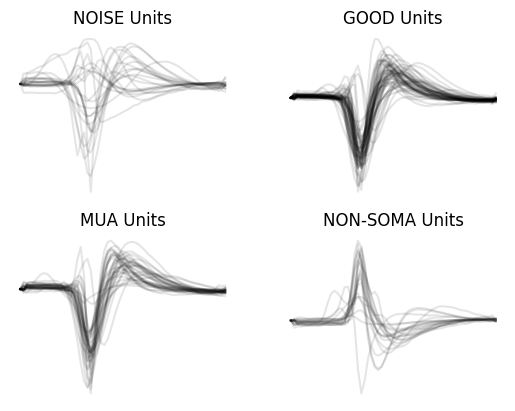

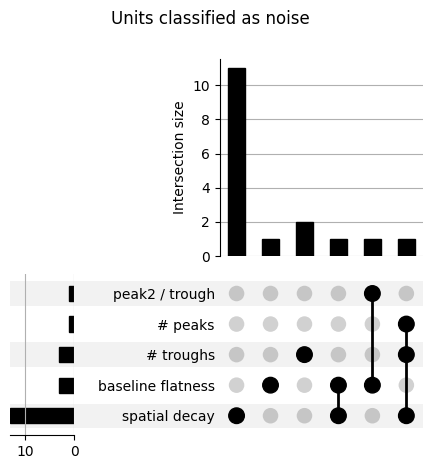

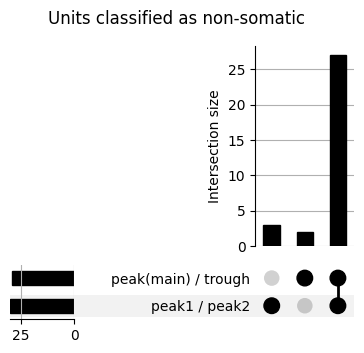

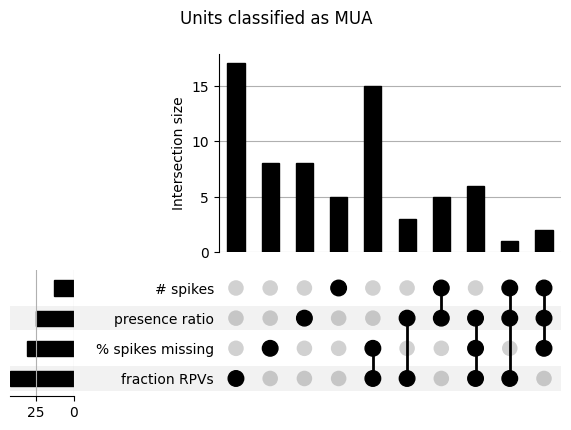

/home/jf5479/anaconda3/envs/bombcell/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7101: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/jf5479/anaconda3/envs/bombcell/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7102: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


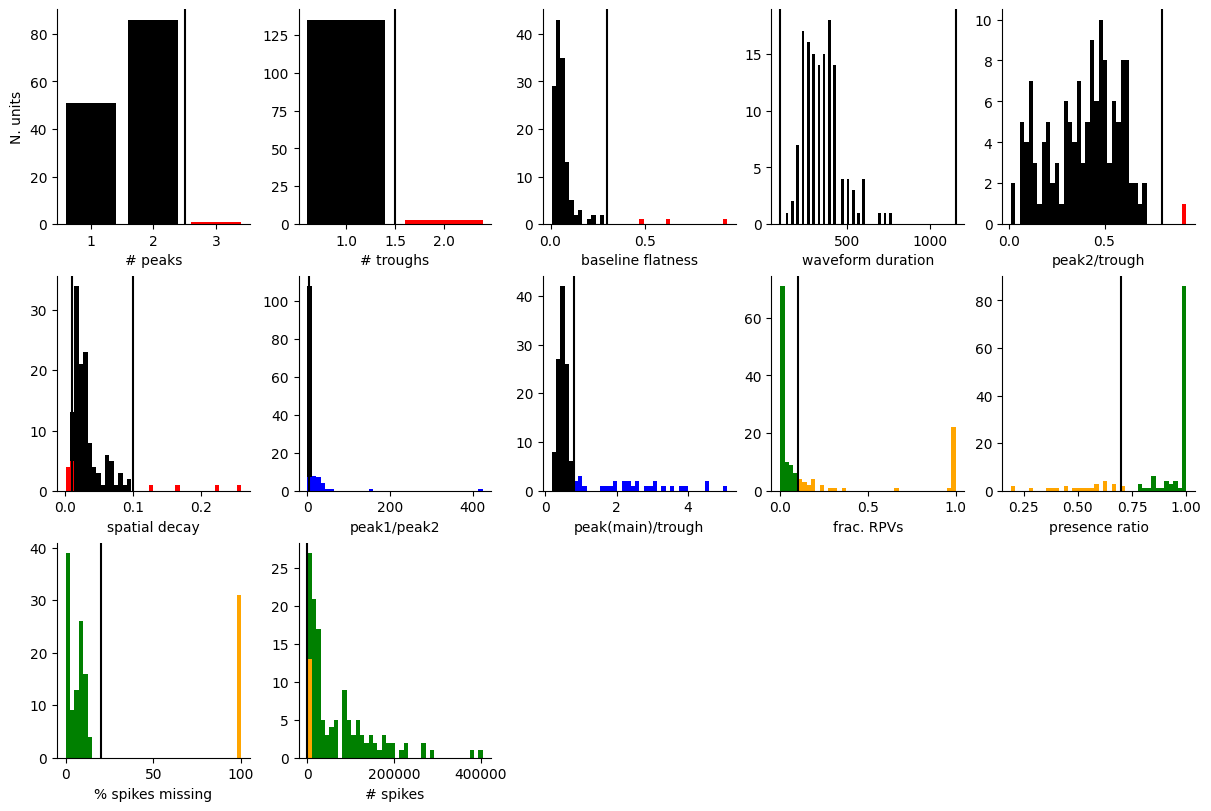

All expected metrics were successfully saved.


In [15]:
(
    quality_metrics,
    param,
    unit_type,
    unit_type_string,
) = bc.run_bombcell(
    ks_dir, save_path, param
)

Reload quality metrics table

In [20]:
# quality metric values
quality_metrics_table = pd.DataFrame(quality_metrics)
quality_metrics_table.insert(0, 'Bombcell_unit_type', unit_type_string)
quality_metrics_table

,Bombcell_unit_type,phy_clusterID,nSpikes,nPeaks,nTroughs,waveformDuration_peakTrough,spatialDecaySlope,waveformBaselineFlatness,scndPeakToTroughRatio,mainPeakToTroughRatio,peak1ToPeak2Ratio,troughToPeak2Ratio,mainPeak_before_width,mainTrough_width,percentageSpikesMissing_gaussian,percentageSpikesMissing_symmetric,RPV_window_index,fractionRPVs_estimatedTauR,presenceRatio,maxDriftEstimate,cumDriftEstimate,rawAmplitude,signalToNoiseRatio,isolationDistance,Lratio,silhouetteScore,useTheseTimesStart,useTheseTimesStop,maxChannels
0,MUA,0,12531.0,2.0,1.0,300.000000,0.025852,0.027249,0.397105,0.397105,0.578461,4.353314,NaN,3.762758,9.849033,39.281907,0.0,0.167895,1.000000,36.591587,140.981445,95.147794,17.359004,NaN,NaN,NaN,0.003833,4387.514967,1
1,NOISE,1,27148.0,2.0,1.0,433.333333,0.001318,0.282522,0.691792,0.691792,1.000000,1.445521,NaN,10.218586,11.282480,32.063762,0.0,1.000000,1.000000,13.275711,154.386139,81.783655,39.659318,NaN,NaN,NaN,0.003833,4387.514967,0
2,MUA,2,16230.0,1.0,1.0,600.000000,0.022720,0.159244,0.345212,0.345212,0.082144,35.264683,11.822669,8.685377,100.000000,13.894636,0.0,1.000000,1.000000,88.453358,223.917088,74.881063,11.151496,NaN,NaN,NaN,0.003833,4387.514967,1
3,MUA,3,5801.0,2.0,1.0,400.000000,0.011218,0.066674,0.395594,0.395594,0.523529,4.828471,NaN,6.113630,10.814629,43.712401,0.0,0.956110,0.780822,29.536861,337.050392,77.575703,16.088116,NaN,NaN,NaN,0.003833,4387.514967,2
4,GOOD,4,26562.0,2.0,1.0,300.000000,0.026757,0.029057,0.543130,0.543130,0.749015,2.458134,NaN,4.727452,1.443113,4.191314,0.0,0.085937,1.000000,30.199593,121.033363,97.514936,20.400915,NaN,NaN,NaN,0.003833,4387.514967,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,MUA,138,5489.0,1.0,1.0,233.333333,0.031424,0.020925,0.318595,0.318595,0.074663,42.039429,NaN,2.918676,9.885105,41.268992,0.0,0.189014,1.000000,28.169922,165.417969,119.623138,46.222027,NaN,NaN,NaN,0.003833,4387.514967,125
139,MUA,139,5700.0,1.0,1.0,466.666667,0.026308,0.073812,0.440791,0.440791,0.321497,7.056509,NaN,6.648482,10.336293,40.031562,0.0,0.308229,1.000000,32.089600,217.536865,66.171154,11.159288,NaN,NaN,NaN,0.003833,4387.514967,138
140,NON-SOMA,140,99.0,2.0,1.0,400.000000,0.066786,0.034273,0.255365,0.908673,3.558328,1.100506,2.348477,7.292709,100.000000,0.000000,0.0,0.000000,0.356164,74.517578,514.809448,127.300156,66.911368,NaN,NaN,NaN,0.003833,4387.514967,149
141,MUA,141,151.0,2.0,1.0,466.666667,0.033076,0.066439,0.410169,0.410169,0.696073,3.502532,15.599846,6.459551,0.361285,0.000000,0.0,0.000000,0.452055,59.163055,349.275726,99.897135,16.121575,NaN,NaN,NaN,0.003833,4387.514967,30


In [12]:
# boolean table, if quality metrics pass threshold given parameters
boolean_quality_metrics_table = bc.make_qm_table(
    quality_metrics, param, unit_type_string
)
boolean_quality_metrics_table

,unit_type,Original ID,# peaks,# troughs,waveform duration,baseline flatness,peak2 / trough,spatial decay,# spikes,% spikes missing,presence ratio,fraction RPVs,amplitude,SNR,max. drift,non somatic,peak(main) / trough,peak1 / peak2,isolation dist.,L-Ratio
0,MUA,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
1,NOISE,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True
2,MUA,2,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,True
3,MUA,3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
4,MUA,4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,MUA,138,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
139,MUA,139,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True
140,NON-SOMA,140,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,True,True,True
141,MUA,141,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,True


Example: get all quality metrics for unit 10

In [14]:
u = 12

units = quality_metrics_table.phy_clusterID
quality_metrics_table.loc[units == u, :]

,Bombcell_unit_type,phy_clusterID,nSpikes,nPeaks,nTroughs,waveformDuration_peakTrough,spatialDecaySlope,waveformBaselineFlatness,scndPeakToTroughRatio,mainPeakToTroughRatio,peak1ToPeak2Ratio,troughToPeak2Ratio,mainPeak_before_width,mainTrough_width,percentageSpikesMissing_gaussian,percentageSpikesMissing_symmetric,RPV_window_index,fractionRPVs_estimatedTauR,presenceRatio,maxDriftEstimate,cumDriftEstimate,rawAmplitude,signalToNoiseRatio,isolationDistance,Lratio,silhouetteScore,useTheseTimesStart,useTheseTimesStop,maxChannels
12,MUA,12,30364.0,1.0,1.0,366.666667,0.018541,0.046643,0.490515,0.490515,0.09509,21.439411,5.479138,5.29199,11.015077,42.510934,0.0,1.0,1.0,15.802353,71.53537,86.321014,15.8994,21.661644,0.184002,NaN,0.003833,4387.514967,14


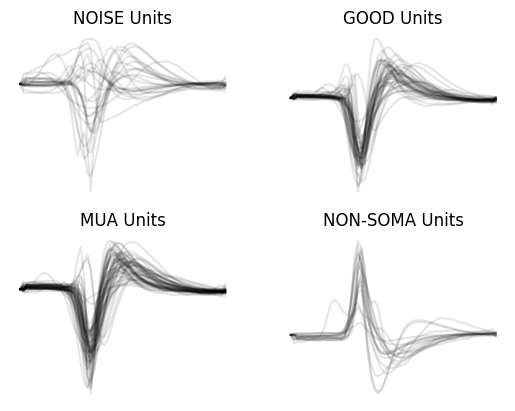

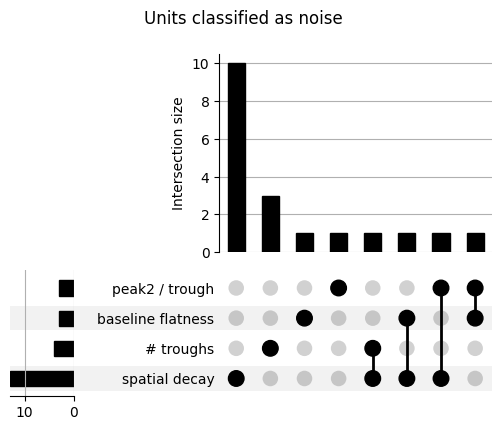

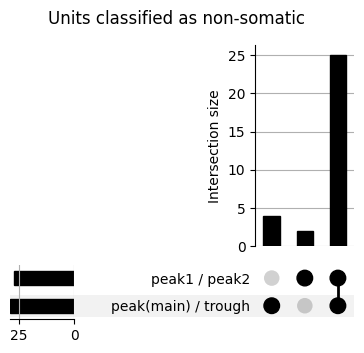

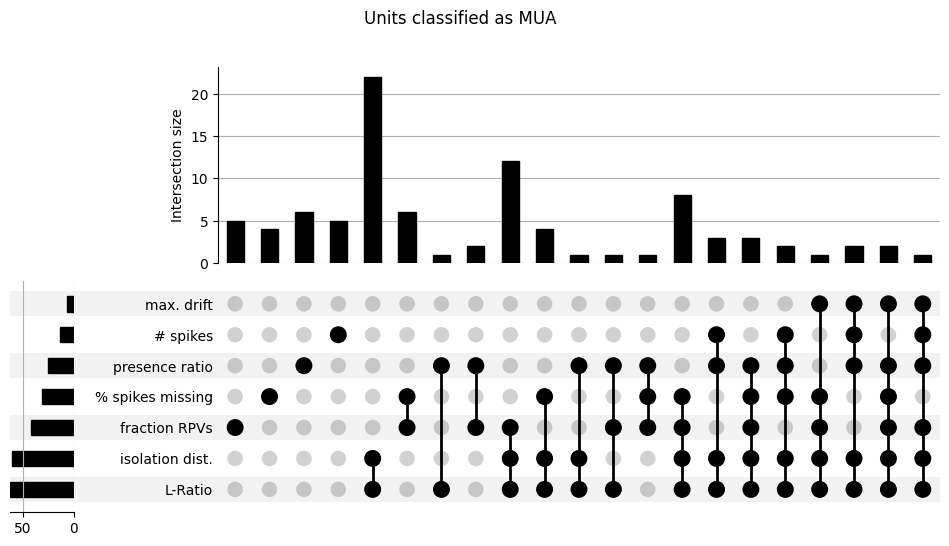

/home/julie/.conda/envs/pybombcell/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7096: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/julie/.conda/envs/pybombcell/lib/python3.11/site-packages/matplotlib/axes/_axes.py:7097: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


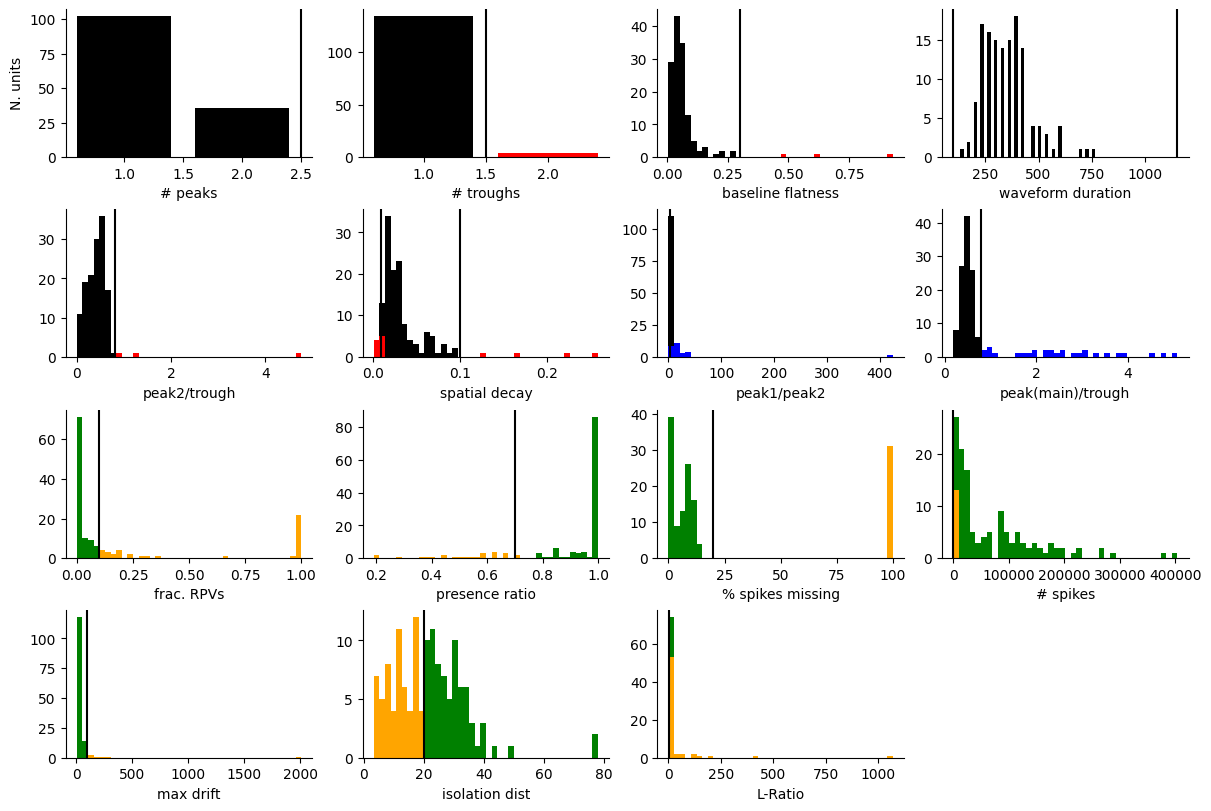

In [18]:
param["lratioMax"] = 0.3
unit_type, unit_type_string = bc.qm.get_quality_unit_type(
        param, quality_metrics
    )  # JF: this should be inside bc.get_all_quality_metrics
(
    spike_times_samples,
    spike_clusters, # actually spike_templates, but they're the same in bombcell
    template_waveforms,
    template_amplitudes,
    pc_features,
    pc_features_idx,
    channel_positions,
) = bc.load_ephys_data(ks_dir)
bc.plot_summary_data(quality_metrics, template_waveforms, unit_type, unit_type_string, param)
